In [1]:
import os
import pandas as pd
import numpy as np

# models
from fbprophet import Prophet

# plots
import matplotlib.pyplot as plt
import seaborn as sns

color = sns.color_palette()
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

Importing plotly failed. Interactive plots will not work.


In [2]:
df_faang = pd.read_csv(os.getcwd() +"/data.tmp/processed/fang.csv", low_memory=False)
df_faang.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Name
0,2002-05-23,1.242857,1.145714,1.156429,1.196429,104790000.0,1.196429,NFLX
1,2002-05-24,1.225000,1.197143,1.214286,1.210000,11104800.0,1.210000,NFLX
2,2002-05-28,1.232143,1.157143,1.213571,1.157143,6609400.0,1.157143,NFLX
3,2002-05-29,1.164286,1.085714,1.164286,1.103571,6757800.0,1.103571,NFLX
4,2002-05-30,1.107857,1.071429,1.107857,1.071429,10154200.0,1.071429,NFLX


In [3]:
df_faang.isnull().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
Name         0
dtype: int64

There is no empty data. No rows needs to be dropped

In [4]:
df_faang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26850 entries, 0 to 26849
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       26850 non-null  object 
 1   High       26850 non-null  float64
 2   Low        26850 non-null  float64
 3   Open       26850 non-null  float64
 4   Close      26850 non-null  float64
 5   Volume     26850 non-null  float64
 6   Adj Close  26850 non-null  float64
 7   Name       26850 non-null  object 
dtypes: float64(6), object(2)
memory usage: 1.6+ MB


We need to make change the Date column to Date type and make it to be the index

# Data Cleaning

In [5]:
df_faang["Date"] = pd.to_datetime(df_faang["Date"])
df_faang = df_faang.set_index("Date")
df_faang.head()

,High,Low,Open,Close,Volume,Adj Close,Name
Date,,,,,,,
2002-05-23,1.242857,1.145714,1.156429,1.196429,104790000.0,1.196429,NFLX
2002-05-24,1.225000,1.197143,1.214286,1.210000,11104800.0,1.210000,NFLX
2002-05-28,1.232143,1.157143,1.213571,1.157143,6609400.0,1.157143,NFLX
2002-05-29,1.164286,1.085714,1.164286,1.103571,6757800.0,1.103571,NFLX
2002-05-30,1.107857,1.071429,1.107857,1.071429,10154200.0,1.071429,NFLX


# Seperate the FAANG dataframe 

In [6]:
df_facebook = df_faang.loc[df_faang['Name'] == 'FB']
df_apple = df_faang.loc[df_faang['Name'] == 'AAPL']
df_amazon = df_faang.loc[df_faang['Name'] == 'AMZN']
df_netflix = df_faang.loc[df_faang['Name'] == 'NFLX']
df_google = df_faang.loc[df_faang['Name'] == 'GOOGL']

In [7]:
df_google.head()

,High,Low,Open,Close,Volume,Adj Close,Name
Date,,,,,,,
2004-08-19,52.082081,48.028027,50.050049,50.220219,44659000.0,50.220219,GOOGL
2004-08-20,54.594593,50.300301,50.555557,54.209209,22834300.0,54.209209,GOOGL
2004-08-23,56.796795,54.579578,55.430431,54.754753,18256100.0,54.754753,GOOGL
2004-08-24,55.855854,51.836838,55.675674,52.487488,15247300.0,52.487488,GOOGL
2004-08-25,54.054054,51.991993,52.532532,53.053055,9188600.0,53.053055,GOOGL


# Understand more about the data with visualisation

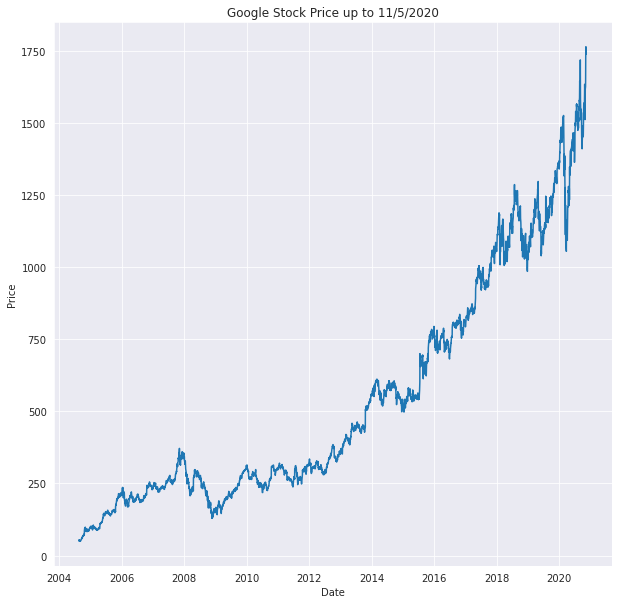

In [8]:
plt.figure(figsize=(10,10))
plt.plot(df_google['Close'])
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Google Stock Price up to 11/5/2020")
plt.show()

Let's explore further

## Moving average
- Moving average is an indicator that smooth the volatility of daily price changes. 
- We will be using simple moving average which is the arithmetic mean over a specfic time period

We will use 50 days and 200 days moving average.

In [9]:
df_google["MA50"] = df_google['Close'].rolling(window=50).mean()
df_google["MA200"] = df_google['Close'].rolling(window=200).mean()
df_google['ewma'] = df_google['Close'].ewm(halflife=0.5, min_periods=20).mean()

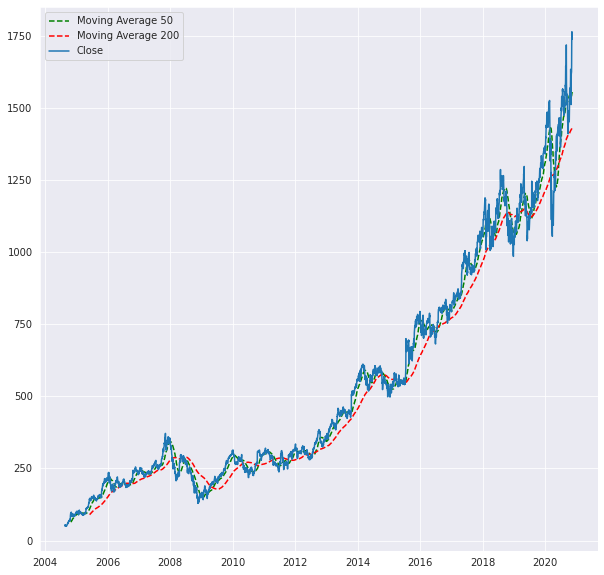

In [10]:
plt.figure(figsize=(10,10))
plt.plot(df_google['MA50'], 'g--', label="Moving Average 50")
plt.plot(df_google['MA200'], 'r--', label="Moving Average 200")
plt.plot(df_google['Close'], label="Close")
plt.legend()
plt.show()

## Let's take the last 200 trading days for Moving Average

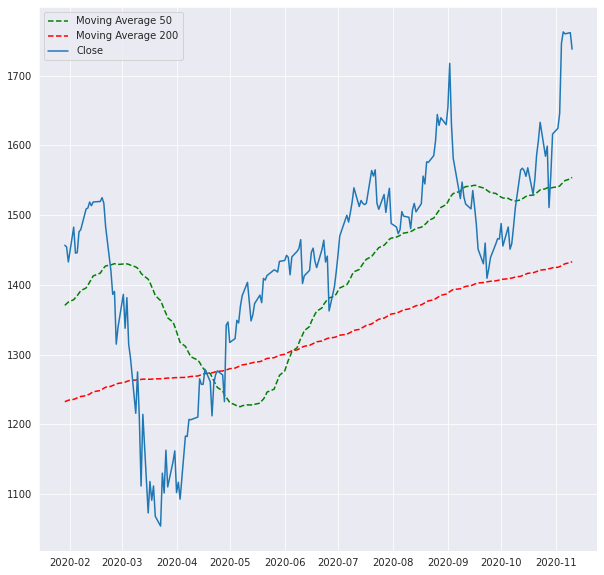

In [11]:
plt.figure(figsize=(10,10))
plt.plot(df_google['MA50'].iloc[-200:], 'g--', label="Moving Average 50")
plt.plot(df_google['MA200'].iloc[-200:], 'r--', label="Moving Average 200")
plt.plot(df_google['Close'].iloc[-200:], label="Close")
plt.legend()
plt.show()

Moving Average 50 days intersect with Moving Average 200 days. If the MA50 cross above MA200, it is an indication to buy. Otherwise, sell
<br>
### Our data visualisation with moving average indicate that we should buy 

## Explore further with Bollinger Bands

1. Middle Band= 20-day simple moving average (SMA)
2. Upper Band= 20-day SMA+(20-day standard deviation of price x 2)
3. Lower Band= 20-day SMA–(20-day standard deviation of price x 2)

Bollinger Bands illustrate the relative strength or momentum of a stock

In [12]:
df_google['middle_band'] = df_google['Close'].rolling(window=20).mean()
df_google['upper_band'] = df_google['Close'].rolling(window=20).mean() + df_google['Close'].rolling(window=20).std()*2
df_google['lower_band'] = df_google['Close'].rolling(window=20).mean() - df_google['Close'].rolling(window=20).std()*2

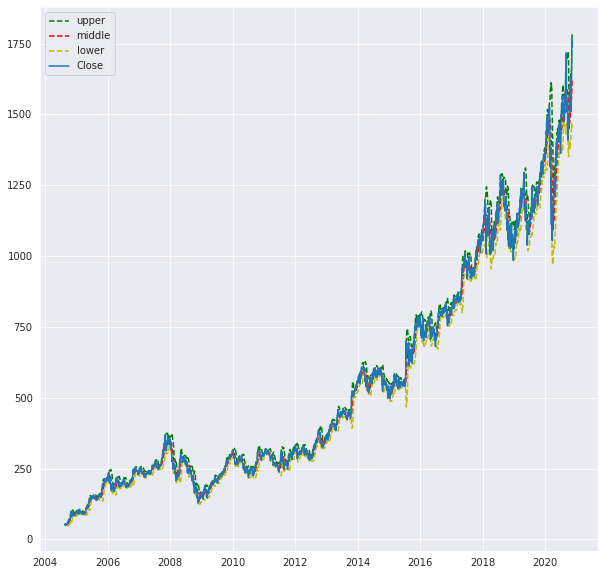

In [13]:
plt.figure(figsize=(10,10))
plt.plot(df_google['upper_band'], 'g--', label="upper")
plt.plot(df_google['middle_band'], 'r--', label="middle")
plt.plot(df_google['lower_band'], 'y--', label="lower")
plt.plot(df_google['Close'], label="Close")
plt.legend()
plt.show()

## Let's take the last 200 trading days for Bollinger Bands

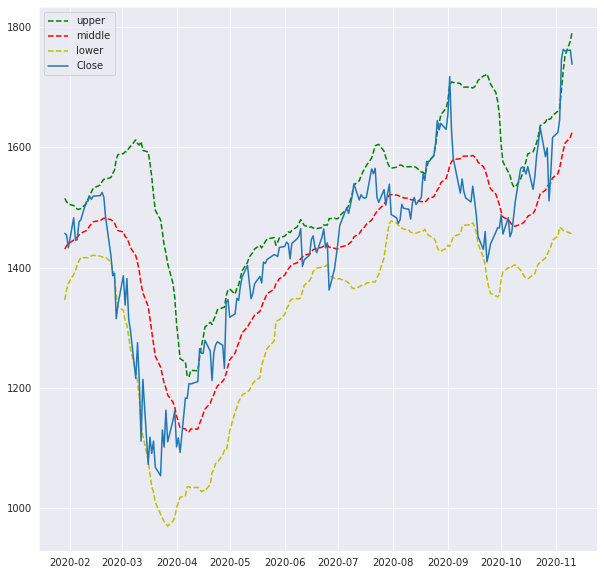

In [14]:
plt.figure(figsize=(10,10))
plt.plot(df_google['upper_band'].iloc[-200:], 'g--', label="upper")
plt.plot(df_google['middle_band'].iloc[-200:], 'r--', label="middle")
plt.plot(df_google['lower_band'].iloc[-200:], 'y--', label="lower")
plt.plot(df_google['Close'].iloc[-200:], label="Close")
plt.legend()
plt.show()

### From bollinger bands, the trend of GOOGLE stock seems to be increasing 

***
# Use Prophet Model 
## Will GOOGLE stock increase in the future just like what we found out from the data visualization?

In [15]:
df_prophet = df_google.copy()
df_prophet.reset_index(drop=False, inplace=True)
df_prophet = df_prophet[["Date","Close"]]
df_prophet.head()

,Date,Close
0,2004-08-19,50.220219
1,2004-08-20,54.209209
2,2004-08-23,54.754753
3,2004-08-24,52.487488
4,2004-08-25,53.053055


According to Prophet documentation , we have to only have two column with ds and y columns

In [16]:
df_prophet.rename(columns={
    "Date": "ds",
    "Close": "y"
}, inplace=True)
df_prophet.head()

,ds,y
0,2004-08-19,50.220219
1,2004-08-20,54.209209
2,2004-08-23,54.754753
3,2004-08-24,52.487488
4,2004-08-25,53.053055


In [17]:
df_prophet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4087 entries, 0 to 4086
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      4087 non-null   datetime64[ns]
 1   y       4087 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 64.0 KB


Reduce the GOOGLE  stock rows to start from 2017-01-01 to the current date

In [18]:
df_prophet = df_prophet.loc[df_prophet["ds"].dt.year >= 2017]
df_prophet.reset_index(drop=True, inplace=True)
df_prophet

,ds,y
0,2017-01-03,808.010010
1,2017-01-04,807.770020
2,2017-01-05,813.020020
3,2017-01-06,825.210022
4,2017-01-09,827.179993
...,...,...
967,2020-11-04,1745.849976
968,2020-11-05,1762.500000
969,2020-11-06,1759.729980
970,2020-11-09,1761.420044


In [19]:
model_prophet = Prophet(daily_seasonality=True)
model_prophet.fit(df_prophet)

In [20]:
future = model_prophet.make_future_dataframe(periods=365) 
prediction = model_prophet.predict(future)

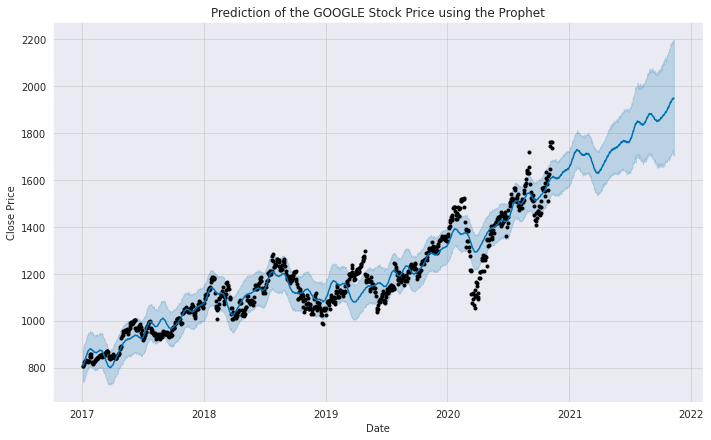

In [21]:
model_prophet.plot(prediction)
plt.title("Prediction of the GOOGLE Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

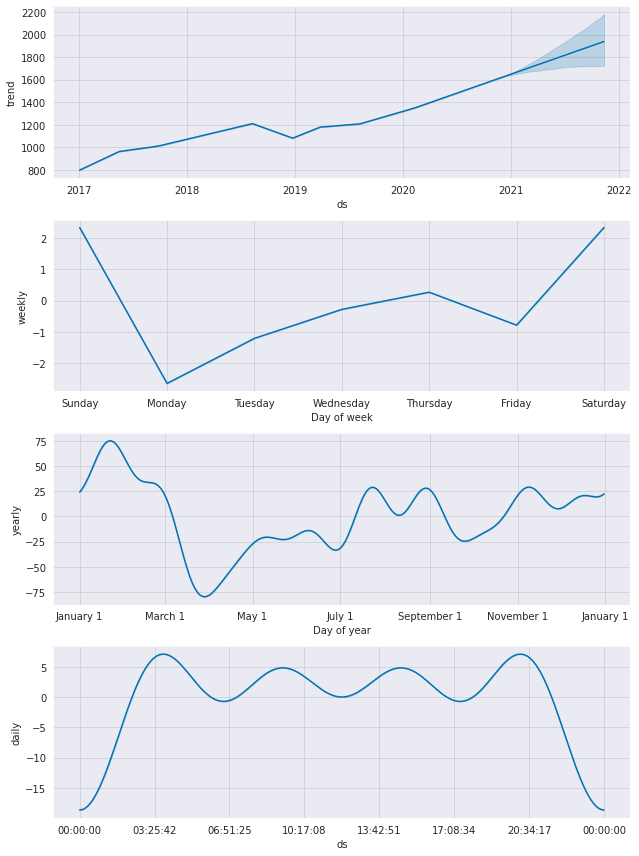

In [22]:
model_prophet.plot_components(prediction)
plt.show()

Based on the estimated trends
- GOOGLE stock price is maximum mostly on Thursday
- Seasonality information indicates it is best to sell in january and buy in April

### Prophet predicts that GOOGLE stock price will increase in the upcoming year which matches up with our prediction from data visualisation